# 1. Importing Libraries

In [ ]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
!pip install scikit-plot

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scikitplot as skplt
%matplotlib inline

from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

import time

import tensorflow as tf
import keras
import torch
from keras.models import Sequential, save_model, load_model
from keras.layers import Conv1D, MaxPool1D, Flatten, Dense, BatchNormalization, Dropout, ActivityRegularization
from keras.callbacks import LearningRateScheduler
import keras_tuner as kt

import warnings
warnings.simplefilter(action = 'ignore', category=Warning)

In [ ]:
# mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Loading the dataset & Data Exploration

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/COMP534/Assignment3

star_data = pd.read_csv("stars_data.csv")
star_data.head()

/content/drive/My Drive/Colab Notebooks/COMP534/Assignment3


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [ ]:
star_data.shape

(240, 7)

In [ ]:
star_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
# Making a copy of the dataset
df = star_data.copy()

## 2.1 Exploring the Categorical data

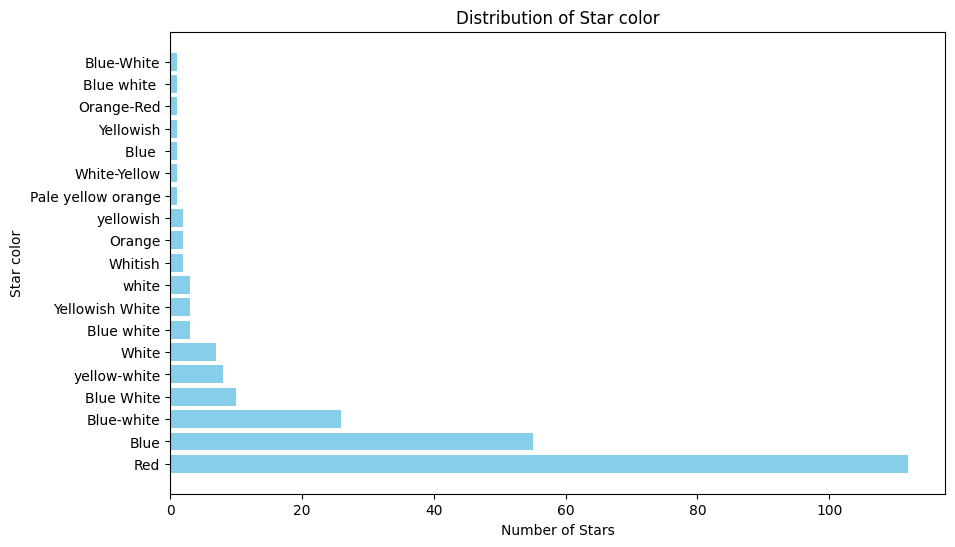

In [ ]:
# Extract the Star color column
star_color_counts = df['Star color'].value_counts()

# Plot a horizontal histogram (bar plot)
plt.figure(figsize = (10, 6))
plt.barh(star_color_counts.index, star_color_counts.values, color = 'skyblue')
plt.xlabel('Number of Stars')
plt.ylabel('Star color')
plt.title('Distribution of Star color')
plt.show()

In [ ]:
# Creating a dictionary to map and correctly group the "Star color" column into integer values to train the model
star_color_mapping = {
    "Red":0,
    "Blue":1,
    "Blue ":1,
    "Blue-white":2,
    "Blue White":2,
    "Blue white":2,
    "Blue white":2,
    "Blue-White":2,
    "Blue white ":2,
    "white":3,
    "white ":3,
    "White":3,
    "Whitish":3,
    "yellow-white":4,
    "Yellowish White":4,
    "White-Yellow":4,
    "yellowish":4,
    "Yellowish":4,
    "Pale yellow orange":4,
    "Orange":5,
    "Orange-Red":5
}

In [ ]:
# Creating a new column named "Star color encoded" from "Star color" using mapping
df['Star color encoded'] = df["Star color"].replace(star_color_mapping)

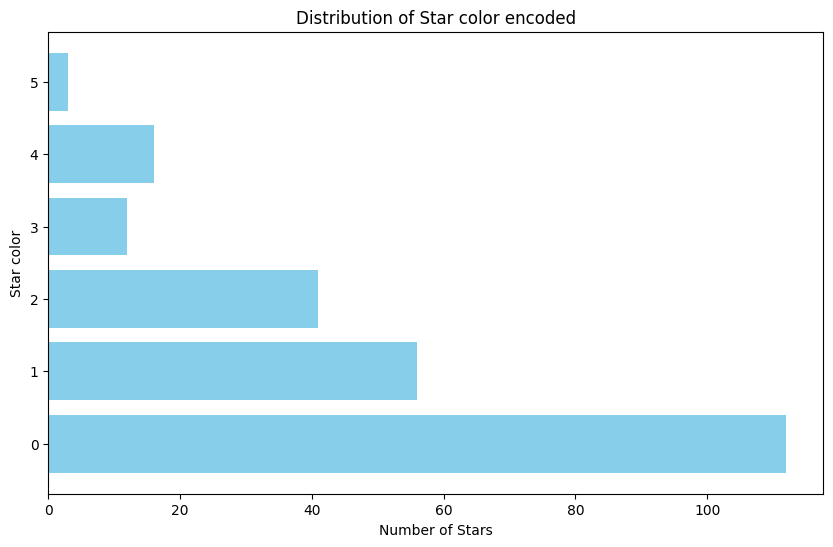

In [ ]:
# Extract the Star color column
star_color_counts = df['Star color encoded'].value_counts()

# Plot a horizontal histogram (bar plot)
plt.figure(figsize = (10, 6))
plt.barh(star_color_counts.index, star_color_counts.values, color = 'skyblue')
plt.xlabel('Number of Stars')
plt.ylabel('Star color')
plt.title('Distribution of Star color encoded')
plt.show()

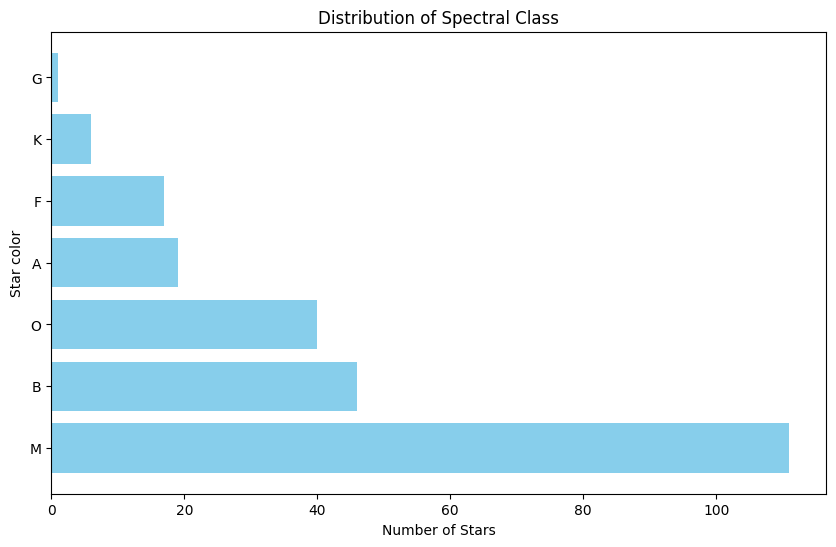

In [ ]:
# Extract the Spectral Class column
Spectral_Class_counts = df['Spectral Class'].value_counts()

# Plot a horizontal histogram (bar plot)
plt.figure(figsize = (10, 6))
plt.barh(Spectral_Class_counts.index, Spectral_Class_counts.values, color = 'skyblue')
plt.xlabel('Number of Stars')
plt.ylabel('Star color')
plt.title('Distribution of Spectral Class')
plt.show()

In [ ]:
# Creating a dictionary to map and correctly group the "Spectral Class" column into integer values to train the model
spectral_class_mappring = {
    "M":0,
    "B":1,
    "O":2,
    "A":3,
    "F":4,
    "K":5,
    "G":6
}

In [ ]:
# Creating a new column named "Spectral Class Encoded" from "Spectral Class" using mapping
df["Spectral Class encoded"] = df["Spectral Class"].replace(spectral_class_mappring)

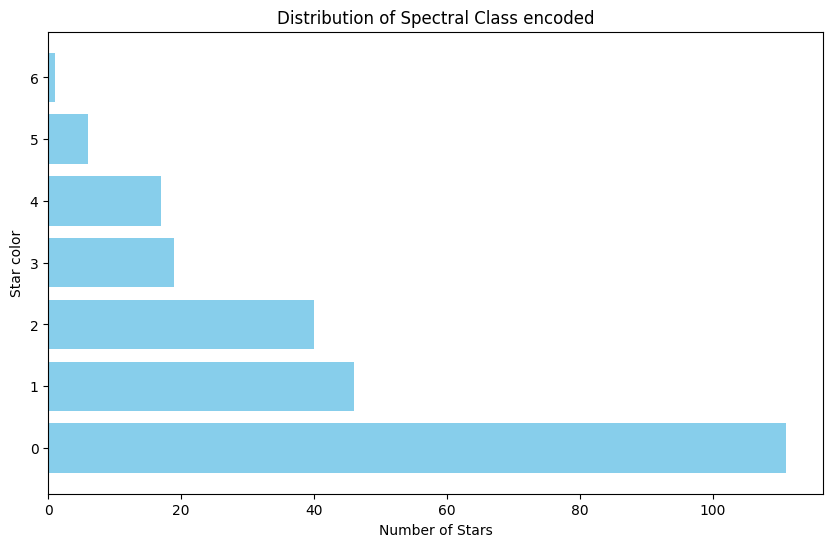

In [ ]:
# Extract the Spectral Class column
Spectral_Class_counts = df['Spectral Class encoded'].value_counts()

# Plot a horizontal histogram (bar plot)
plt.figure(figsize = (10, 6))
plt.barh(Spectral_Class_counts.index, Spectral_Class_counts.values, color = 'skyblue')
plt.xlabel('Number of Stars')
plt.ylabel('Star color')
plt.title('Distribution of Spectral Class encoded')
plt.show()

In [ ]:
# Now we have two new encoded columns, named- "Star color encoded" & "Spectral Class Encoded"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
 7   Star color encoded      240 non-null    int64  
 8   Spectral Class encoded  240 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 17.0+ KB


In [ ]:
# For the training purpose, we no longer need for "Star color" & "Spectral Class", we can drop this two columns
df.drop(labels = "Star color", axis = 1, inplace = True) # Dropping the "Star color"
df.drop(labels = "Spectral Class", axis = 1, inplace = True) # Dropping the "Spectra Class"
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color encoded,Spectral Class encoded
0,3068,0.002400,0.1700,16.12,0,0,0
1,3042,0.000500,0.1542,16.60,0,0,0
2,2600,0.000300,0.1020,18.70,0,0,0
3,2800,0.000200,0.1600,16.65,0,0,0
4,1939,0.000138,0.1030,20.06,0,0,0


## 2.2 Saving the processed dataset

In [ ]:
# saving the processed dataset
df.to_csv('stars_data_processed.csv', index = False)  # To save without row indices

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/COMP534/Assignment3

# Loading the processed dataset
data = pd.read_csv("stars_data_processed.csv")
data.head()

/content/drive/My Drive/Colab Notebooks/COMP534/Assignment3


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color encoded,Spectral Class encoded
0,3068,0.002400,0.1700,16.12,0,0,0
1,3042,0.000500,0.1542,16.60,0,0,0
2,2600,0.000300,0.1020,18.70,0,0,0
3,2800,0.000200,0.1600,16.65,0,0,0
4,1939,0.000138,0.1030,20.06,0,0,0


## 2.3 Over Sampling- RandomOverSampler

In [ ]:
# Instantiate the RandomOverSampler with the appropriate parameters
os = RandomOverSampler(sampling_strategy = 'auto')

# Separate features (X) and target variable (y)
X = data.iloc[:, :-1]  # Select all columns except the last one
y = data.iloc[:, -1]   # Select only the last column

# Apply RandomOverSampler to resample the dataset
X_res, y_res = os.fit_resample(X, y)

print(X_res.shape, y_res.shape)

(777, 6) (777,)


In [ ]:
y_res.value_counts()

Spectral Class encoded
0    111
1    111
3    111
4    111
2    111
5    111
6    111
Name: count, dtype: int64

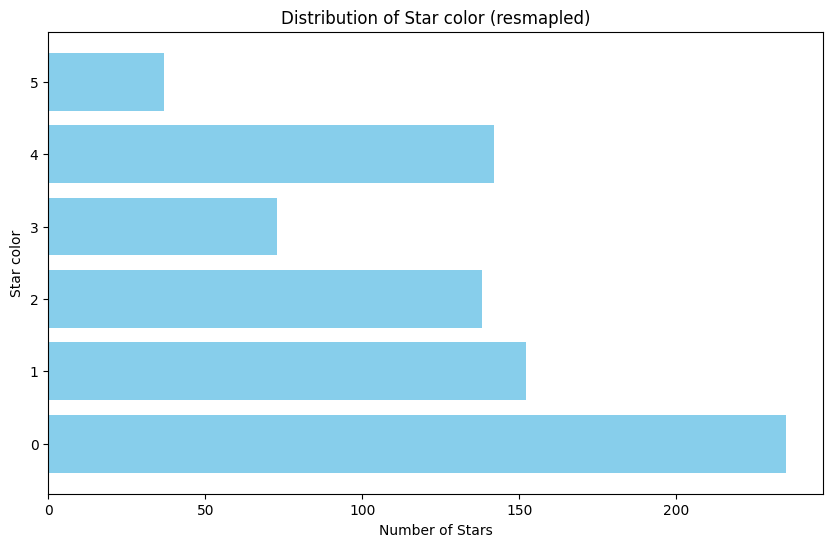

In [ ]:
X_res["Star color encoded"].value_counts()
# Extract the Spectral Class column
star_color_counts = X_res["Star color encoded"].value_counts()

# Plot a horizontal histogram (bar plot)
plt.figure(figsize = (10, 6))
plt.barh(star_color_counts.index, star_color_counts.values, color = 'skyblue')
plt.xlabel('Number of Stars')
plt.ylabel('Star color')
plt.title('Distribution of Star color (resmapled)')
plt.show()

## 2.4 Exploring the Numeric data

In [ ]:
# Checking the statistical description for the numeic columns except the recently encoded the columns
X_res.iloc[:,:-2].describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
count,777.000000,777.000000,777.000000,777.000000
mean,10500.837838,128832.825428,394.355543,1.507743
std,8092.285093,185413.059683,630.757964,9.933948
min,1939.000000,0.000080,0.008400,-11.920000
25%,4980.000000,0.001100,0.098700,-8.300000
50%,7230.000000,45.000000,2.630000,0.120000
75%,13023.000000,229000.000000,1130.000000,12.170000
max,40000.000000,849420.000000,1948.500000,20.060000


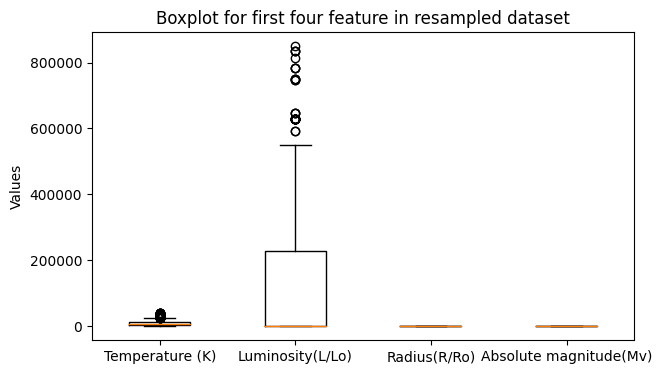

In [ ]:
# Creating boxplot
plt.figure(figsize = (7, 4))

plt.boxplot(X_res.iloc[:,:-2])

# Adding labels
plt.xticks(range(1,5), ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'])
plt.ylabel('Values')

# Title
plt.title('Boxplot for first four feature in resampled dataset')

# Displaying the plot
plt.show()

## 2.5 Splitting the dataset into training and testing dataset and Normalisation

In [ ]:
np.random.seed(42)
# Performing the train-test split on the dataset using the X_res & y_res, which we get from the over-sampling
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20,random_state = 42)

In [ ]:
# Normalizing the dataset
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

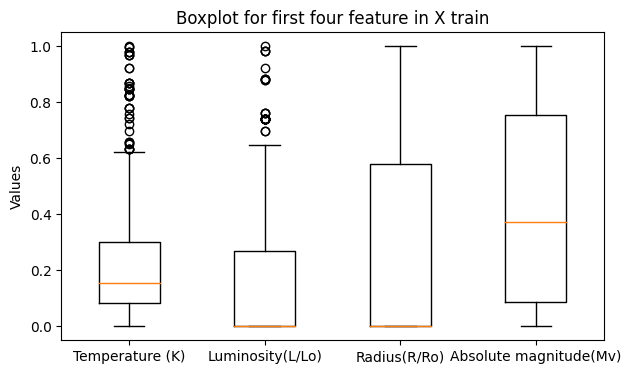

In [ ]:
# Creating boxplot
train = pd.DataFrame(X_train_sc)
plt.figure(figsize = (7, 4))

plt.boxplot(train.iloc[:,:-2])

# Adding labels
plt.xticks(range(1,5), ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'])
plt.ylabel('Values')

# Title
plt.title('Boxplot for first four feature in X train')

# Displaying the plot
plt.show()

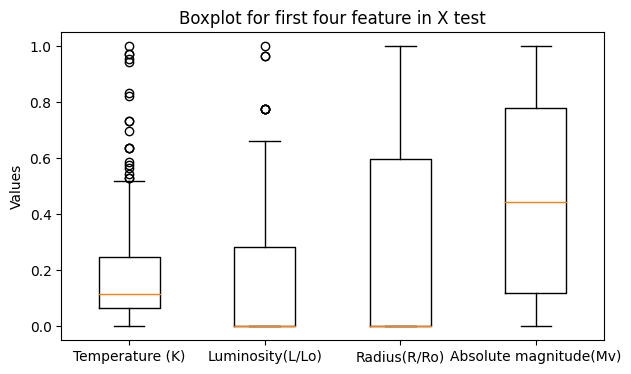

In [ ]:
# Creating boxplot
test = pd.DataFrame(X_test_sc)
plt.figure(figsize = (7, 4))

plt.boxplot(test.iloc[:,:-2])

# Adding labels
plt.xticks(range(1,5), ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'])
plt.ylabel('Values')

# Title
plt.title('Boxplot for first four feature in X test')

# Displaying the plot
plt.show()

# 3. Supervise Learning Algorithm- Decision Tree

In [ ]:
# Creating a dictionary which we will refer as param_grid in the GridSearchCV
parameter = {
    "criterion" : ["gini","entropy","log_loss"],
    "splitter" : ["best","random"],
    "max_depth" : range(1,16),
    "max_features" : ["auto","sqrt","log2"]
}

## 3.1 Hyperparameter Tuning

In [ ]:
# Creating a variable which refers the instance of the GridSearchCV
clf_dt = GridSearchCV(DecisionTreeClassifier(),param_grid = parameter,cv = 5,scoring = "accuracy")
# Fit the GridSearchCV on the training dataset
clf_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 16),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
## Best parameters for the model using Decision Tree
print(clf_dt.best_params_)

# Training the model with best parameters
# Creating a variable which refers to an instance of DecisionTreeClassifier with best parameters that we got from the above step
classifier_dt_best = clf_dt.best_estimator_

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'splitter': 'best'}


## 3.2 Training the model with the best parameters and using cross validation

In [ ]:
## Using to cross validation to train the model and observing performance metrices

# providing a list of different performance metrics, which will be used in the for loop
scores = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]
# creating a empty list to store the average scores of the model during the training period
avg_score = []
# using the for loop to iterate through the above scores list and perfome the below instructions
for i in scores:
    # this will provide us the particular score that we are using from the scores list
    scores_dt = cross_val_score(classifier_dt_best, X_train, y_train, scoring = i, cv = 3)
    # we are appending the mean of scores which we've got from the above process
    avg_score.append(scores_dt.mean().round(4))

# Creating a pandas dataframe for better understanding of the evaluation metrics
score_dt = pd.DataFrame(avg_score)
score_dt["Method"] = scores
score_dt["Score"] = score_dt[0]
score_dt.drop(columns = 0, inplace = True)
score_dt

,Method,Score
0,accuracy,0.9903
1,precision_macro,0.9898
2,recall_macro,0.9837
3,f1_macro,0.9839


## 3.2 Test the model- Supervised Model

In [ ]:
## Fitting the model with best parameters on training dataset
classifier_dt_best.fit(X_train, y_train)
## Prediction with best parameters
y_pred_dt = classifier_dt_best.predict(X_test)

## 3.3 Confusion Matrix

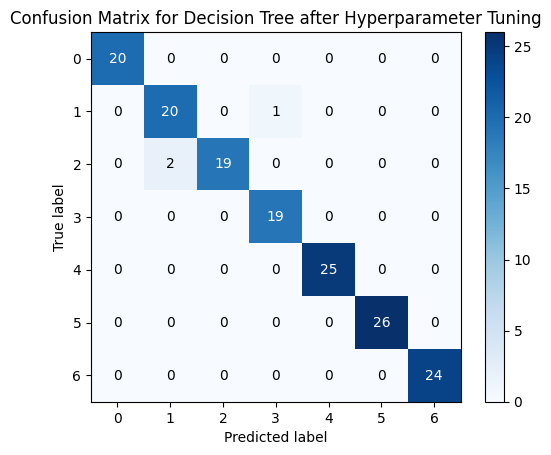

In [ ]:
# Plotting the confusion matrix for Decision Tree after hyperparameter tuning
skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt, normalize = False, title = "Confusion Matrix for Decision Tree after Hyperparameter Tuning")
plt.show()

## 3.3 Evaluation Metrics

In [ ]:
accuracy  = accuracy_score(y_test, y_pred_dt).round(4)
precision = precision_score(y_test, y_pred_dt, average = 'macro').round(4)
recall = recall_score(y_pred_dt, y_test, average = 'macro').round(4)
f1 = f1_score(y_pred_dt, y_test, average = 'macro').round(4)

print("Evaluation Metrics:")
print("="*25)

# Creating a Dataframe for the Evaluation Metrics
scores_dt = [accuracy,precision,recall,f1]
test_score_dt = pd.DataFrame(scores_dt)
test_score_dt["Method"] = ["Accuracy", "Precision_macro", "Recall_macro", "F1_Score_macro"]
test_score_dt["Scores"] = test_score_dt[0]
test_score_dt.drop(columns = 0, inplace = True)
test_score_dt

Evaluation Metrics:


,Method,Scores
0,Accuracy,0.9808
1,Precision_macro,0.9799
2,Recall_macro,0.9799
3,F1_Score_macro,0.9792


In [ ]:
print("Classification Report for Decision Tree:")
print("="*40)
pd.DataFrame(classification_report(y_test, y_pred_dt, target_names = ["M","B","A","F","O","K","G"], output_dict = True)).transpose()

Classification Report for Decision Tree:


,precision,recall,f1-score,support
M,1.000000,1.000000,1.000000,20.000000
B,0.909091,0.952381,0.930233,21.000000
A,1.000000,0.904762,0.950000,21.000000
F,0.950000,1.000000,0.974359,19.000000
O,1.000000,1.000000,1.000000,25.000000
K,1.000000,1.000000,1.000000,26.000000
G,1.000000,1.000000,1.000000,24.000000
accuracy,0.980769,0.980769,0.980769,0.980769
macro avg,0.979870,0.979592,0.979227,156.000000
weighted avg,0.981672,0.980769,0.980755,156.000000


# 4. Unsupervised Model- K-Means

## 4.1 Hyperparameter Tuning

In [ ]:
param_grid = {
    'n_clusters': range(1,11),
    "n_init" : range(1,11),
    'init': ['k-means++', 'random'],
    'algorithm': ["lloyd", "elkan"]
}

grid_search = GridSearchCV(KMeans(), param_grid = param_grid, cv = 5, scoring = "accuracy")
grid_search.fit(X_train_sc, y_train)

# Best parameters and best scores
print("Best parameters for KMeans", grid_search.best_params_)
print("Best score for KMeans", grid_search.best_score_)

# The best model for KMeans
Kmean_best = grid_search.best_estimator_

Best parameters for KMeans {'algorithm': 'elkan', 'init': 'k-means++', 'n_clusters': 5, 'n_init': 2}
Best score for KMeans 0.28362580645161295


## 4.2 Training the model with the best parameters using cross validation

In [ ]:
## Using to cross validation to train the model and observing performance metrices

# providing a list of different performance metrics, which will be used in the for loop
scores = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]
# creating a empty list to store the average scores of the model during the training period
avg_score = []
# using the for loop to iterate through the above scores list and perfome the below instructions
for i in scores:
    # this will provide us the particular score that we are using from the scores list
    scores_dt = cross_val_score(Kmean_best, X_train_sc, y_train, scoring = i,cv = 3)
    # we are appending the mean of scores which we've got from the above process
    avg_score.append(scores_dt.mean().round(4))

# Creating a pandas dataframe for better understanding of the evaluation metrics
score_dt = pd.DataFrame(avg_score)
score_dt["Method"] = scores
score_dt["Score"] = score_dt[0]
score_dt.drop(columns = 0, inplace = True)
score_dt

,Method,Score
0,accuracy,0.1675
1,precision_macro,0.0515
2,recall_macro,0.1178
3,f1_macro,0.0711


## 4.3 Confusion Matrix

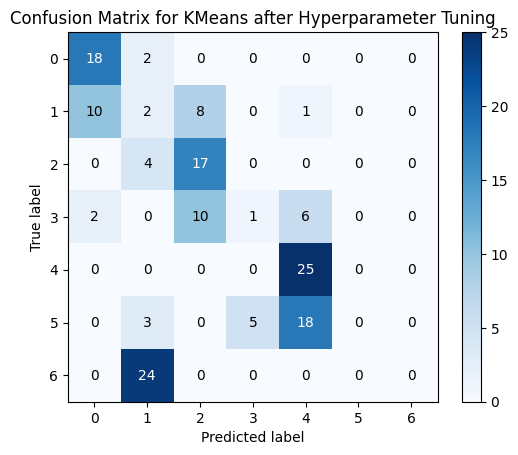

In [ ]:
# Prediction with best model
y_pred_km = Kmean_best.predict(X_test_sc)

# Plotting the confusion matrix for Decision Tree after hyperparameter tuning
skplt.metrics.plot_confusion_matrix(y_test, y_pred_km, normalize = False, title = "Confusion Matrix for KMeans after Hyperparameter Tuning")
plt.show()

## 4.4 Evaluation Metrics

In [ ]:
accuracy  = accuracy_score(y_test, y_pred_km).round(4)
precision = precision_score(y_test, y_pred_km, average = 'macro').round(4)
recall = recall_score(y_pred_km, y_test, average = 'macro').round(4)
f1 = f1_score(y_pred_km, y_test, average = 'macro').round(4)

print("Evaluation Metrics:")
print("="*25)

# Creating a Dataframe for the Evaluation Metrics
scores_dt = [accuracy,precision,recall,f1]
test_score_dt = pd.DataFrame(scores_dt)
test_score_dt["Method"] = ["Accuracy", "Precision_macro", "Recall_macro", "F1_Score_macro"]
test_score_dt["Scores"] = test_score_dt[0]
test_score_dt.drop(columns = 0, inplace = True)
test_score_dt

Evaluation Metrics:


,Method,Scores
0,Accuracy,0.4038
1,Precision_macro,0.2585
2,Recall_macro,0.2585
3,F1_Score_macro,0.3065


# 5. Multi-Layer Percetron

In [ ]:
# use GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


## 5.1 Hyperparameter Tuning

In [ ]:
## MODEL BUILDING

def build_model_mlp(hp):

  # Initialize a Sequential model
  model = Sequential()
  # Adding the input layer
  model.add(Dense(units = hp.Int("neurons_input", min_value = 8, max_value = 128),
                  input_shape = [6,],
                  activation = hp.Choice("activation_input", values = ["relu", "tanh", "leaky_relu", "elu"]),
                  name = "inputLayer")
  )

  # Loop over the number of layers specified by the hyperparameter
  for i in range(hp.Int("num_layers", min_value = 1, max_value = 10)):

    # Define hyperparameters for the dense layers
    neurons = hp.Int("neurons_" + str(i), min_value = 8, max_value = 128)
    activation = hp.Choice("activation_" + str(i), values = ["relu", "tanh", "leaky_relu", "elu"])
    dropout = hp.Choice("dropout_" + str(i), values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

    # Add subsequent layers with weight initializer (HeNormal)
    model.add(Dense(units = neurons, activation = activation, kernel_initializer = tf.keras.initializers.HeNormal() ))

    # Tune whether to use L1 & L2 regularization
    if hp.Boolean("regularization"):
      model.add(ActivityRegularization(
          l1 = hp.Float("L1_" + str(i), min_value = 0.0, max_value = 0.1),
          l2 = hp.Float("L2_" + str(i), min_value = 0.0, max_value = 0.1)
      ))

    # Tune whether to use batch normalization
    if hp.Boolean("batch normalization"):
      model.add(BatchNormalization())

    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
      model.add(Dropout(rate = dropout))

  # Add output layer with 7 neuron as equal the number of labels (classes) and softmax activation for multi-classification
  model.add(Dense(7, activation = "softmax"))

  # Compile the model with hyperparameters
  model.compile(
        optimizer = hp.Choice("optimizer", values = ["adam", "sgd", "rmsprop", "adadelta"]),
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"]
    )

  return model

In [ ]:
# Initialize a RandomSearch tuner for hyperparameter optimization
tuner = kt.RandomSearch(build_model_mlp,
                      objective = "val_accuracy",
                      max_trials = 10,
                      overwrite = True,
                      directory = "assignment3",
                      project_name = "mlp_model")

In [ ]:
# Search for the best hyperparameters using the training data
tuner.search(X_train_sc,y_train,epochs = 10,validation_split = 0.1)

Trial 10 Complete [00h 00m 03s]
val_accuracy: 0.8571428656578064

Best val_accuracy So Far: 0.8888888955116272
Total elapsed time: 00h 00m 45s


In [ ]:
# Best hyperparameter after tuning the model
tuner.get_best_hyperparameters()[0].values

{'neurons_input': 12,
 'activation_input': 'elu',
 'num_layers': 7,
 'neurons_0': 40,
 'activation_0': 'leaky_relu',
 'dropout_0': 0.8,
 'regularization': True,
 'batch normalization': False,
 'dropout': False,
 'optimizer': 'rmsprop',
 'L1_0': 0.031922913978513004,
 'L2_0': 0.06603495784641904,
 'neurons_1': 83,
 'activation_1': 'elu',
 'dropout_1': 0.2,
 'L1_1': 0.043537437475997004,
 'L2_1': 0.0795332085761496,
 'neurons_2': 74,
 'activation_2': 'elu',
 'dropout_2': 0.3,
 'L1_2': 0.08105892318506368,
 'L2_2': 0.08180039535255727,
 'neurons_3': 115,
 'activation_3': 'tanh',
 'dropout_3': 0.3,
 'neurons_4': 90,
 'activation_4': 'tanh',
 'dropout_4': 0.5,
 'neurons_5': 39,
 'activation_5': 'tanh',
 'dropout_5': 0.2,
 'neurons_6': 87,
 'activation_6': 'relu',
 'dropout_6': 0.2,
 'L1_3': 0.0,
 'L2_3': 0.0,
 'L1_4': 0.0,
 'L2_4': 0.0,
 'L1_5': 0.0,
 'L2_5': 0.0,
 'L1_6': 0.0,
 'L2_6': 0.0}

In [ ]:
# Getting the best model
model = tuner.get_best_models(num_models = 1)[0]

In [ ]:
# Summary of the best model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Dense)          (None, 12)                84        
                                                                 
 dense (Dense)               (None, 40)                520       
                                                                 
 activity_regularization (A  (None, 40)                0         
 ctivityRegularization)                                          
                                                                 
 dense_1 (Dense)             (None, 83)                3403      
                                                                 
 activity_regularization_1   (None, 83)                0         
 (ActivityRegularization)                                        
                                                                 
 dense_2 (Dense)             (None, 74)                6

In [ ]:
# Save the model
model.save('best_mlp_model.h5', overwrite = True)

## 5.2 Training with adaptive learning rate

In [ ]:
## Adaptive Learning Rate- learning rate schedulers
# This function keeps the initial learning rate for the first five epochs and decreases it exponentially after that.
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler, verbose = 0)

In [ ]:
# Model for Adaptive Learning Rate- learning rate schedulers
model_lr_sch = tuner.get_best_models(num_models = 1)[0]

In [ ]:
# Using learning rate schedulers as an adaptive learning rate

start_time = time.time()

hist_lr_sch_mlp = model_lr_sch.fit(X_train_sc, y_train, epochs = 20,validation_split = 0.1, callbacks = [lr_scheduler])

end_time = time.time()

training_time = end_time - start_time

print("Training Time: {:.2f} seconds".format(training_time))

Epoch 1/20
18/18 [==============================] - 4s 35ms/step - loss: 1.2042 - accuracy: 0.8710 - val_loss: 1.2824 - val_accuracy: 0.7302 - lr: 0.0010
Epoch 2/20
18/18 [==============================] - 0s 7ms/step - loss: 1.1044 - accuracy: 0.8692 - val_loss: 0.9411 - val_accuracy: 0.8889 - lr: 0.0010
Epoch 3/20
18/18 [==============================] - 0s 10ms/step - loss: 0.9905 - accuracy: 0.8853 - val_loss: 1.0831 - val_accuracy: 0.8413 - lr: 0.0010
Epoch 4/20
18/18 [==============================] - 0s 9ms/step - loss: 0.9030 - accuracy: 0.9050 - val_loss: 1.1135 - val_accuracy: 0.7460 - lr: 0.0010
Epoch 5/20
18/18 [==============================] - 0s 8ms/step - loss: 0.9224 - accuracy: 0.8853 - val_loss: 1.0047 - val_accuracy: 0.7937 - lr: 0.0010
Epoch 6/20
18/18 [==============================] - 0s 8ms/step - loss: 0.8356 - accuracy: 0.9140 - val_loss: 0.8249 - val_accuracy: 0.8889 - lr: 9.0484e-04
Epoch 7/20
18/18 [==============================] - 0s 9ms/step - loss: 0.73

In [ ]:
# Saving the model
model_lr_sch.save("best_mlp_w_lr_sch.h5", overwrite = True)

## 5.3 Visualising loss and val_loss

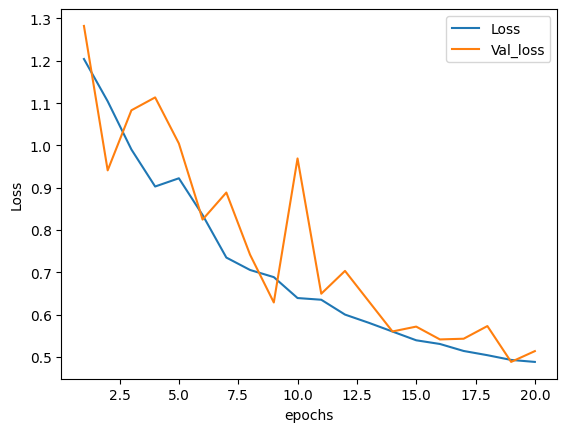

In [ ]:
q = len(hist_lr_sch_mlp.history['loss'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = hist_lr_sch_mlp.history['loss'], label = 'Loss')
sns.lineplot(x = range(1,1+q),y = hist_lr_sch_mlp.history['val_loss'], label = 'Val_loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

## 5.4 Visualising accuracy and val_accuracy

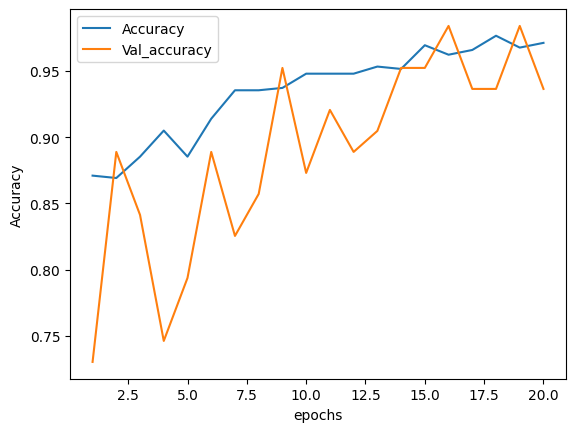

In [ ]:
q = len(hist_lr_sch_mlp.history['accuracy'])

plt.figsize = (10,10)
sns.lineplot(x = range(1,1+q),y = hist_lr_sch_mlp.history['accuracy'], label = 'Accuracy')
sns.lineplot(x = range(1,1+q),y = hist_lr_sch_mlp.history['val_accuracy'], label = 'Val_accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

## 5.5 Confusion Matrix

5/5 [==============================] - 1s 5ms/step


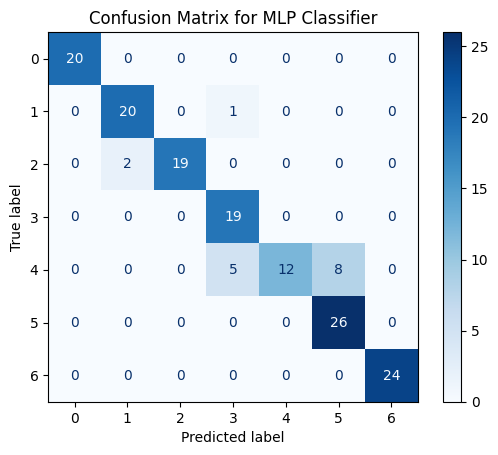

In [ ]:
model
# Predict the test data
y_pred_mlp = model_lr_sch.predict(X_test_sc)
y_hat_mlp = np.argmax(y_pred_mlp, axis = 1)

cm = confusion_matrix(y_test, y_hat_mlp)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix for MLP Classifier')
plt.show()

## 5.6 Evaluation Metrics

In [ ]:
accuracy  = accuracy_score(y_test, y_hat_mlp).round(4)
precision = precision_score(y_test, y_hat_mlp, average = 'macro').round(4)
recall = recall_score(y_hat_mlp, y_test, average = 'macro').round(4)
f1 = f1_score(y_hat_mlp, y_test, average = 'macro').round(4)

print("Evaluation Metrics:")
print("="*25)

# Creating a Dataframe for the Evaluation Metrics
scores_dt = [accuracy,precision,recall,f1]
test_score_dt = pd.DataFrame(scores_dt)
test_score_dt["Method"] = ["Accuracy","Precision_macro","Recall_macro","F1_Score_macro"]
test_score_dt["Scores"] = test_score_dt[0]
test_score_dt.drop(columns = 0,inplace = True)
test_score_dt

Evaluation Metrics:


,Method,Scores
0,Accuracy,0.8974
1,Precision_macro,0.9191
2,Recall_macro,0.9191
3,F1_Score_macro,0.8942


In [ ]:
print("Classification Report for MLP:")
print("="*40)
pd.DataFrame(classification_report(y_test, y_hat_mlp, target_names = ["M","B","A","F","O","K","G"], output_dict=True)).transpose()

Classification Report for MLP:


,precision,recall,f1-score,support
M,1.000000,1.000000,1.000000,20.000000
B,0.909091,0.952381,0.930233,21.000000
A,1.000000,0.904762,0.950000,21.000000
F,0.760000,1.000000,0.863636,19.000000
O,1.000000,0.480000,0.648649,25.000000
K,0.764706,1.000000,0.866667,26.000000
G,1.000000,1.000000,1.000000,24.000000
accuracy,0.897436,0.897436,0.897436,0.897436
macro avg,0.919114,0.905306,0.894169,156.000000
weighted avg,0.919316,0.897436,0.888741,156.000000


# 6. Convolutional Neural Network

## 6.1 Reshaping the dataset for CNN

In [ ]:
# Converting to numpy array
X_train_reshaped = X_train_sc.reshape(-1,6,1)
X_test_reshaped = X_test_sc.reshape(-1,6,1)

## 6.2 Hyperparameter Tuning

In [ ]:
# MODEL BUILDING
def build_model_cnn(hp):

  # Initialize a Sequential model
  model = Sequential()

  # Adding the convolutional input layer
  model.add(Conv1D(
      filters = hp.Int("conv_input_filter", min_value = 32,max_value = 128,step = 8),
      kernel_size = hp.Choice("conv_input_kernel",values = [3,5]),
      padding = hp.Choice("conv_input_padding",values = ["same","valid"]),
      activation = hp.Choice("conv__input_activation",values = ["relu","tanh", "elu"]),
      input_shape = (6,1)
      ))

  # Define hyperparameters for the convolutional layers
  filters_conv = hp.Int("conv_filter" , min_value = 64,max_value = 128,step = 8)
  kernel_conv = hp.Choice("conv_kernel",values = [3,5])
  pool_size = hp.Choice("pool_size", values = [2,3,4,5])
  activation_conv = hp.Choice("conv_activation",values = ["relu","tanh", "elu", "leaky_relu"])
  dropout_coeff_conv = hp.Float("conv_dropout", min_value = 0.05, max_value = 0.2)

  # Tune whether to use convolutional layer
  if hp.Boolean("Conv1D"):
    model.add(Conv1D(filters = filters_conv, kernel_size = kernel_conv,padding = "same", activation = activation_conv))

  # Tune whether to use Maxpooling layer
  if hp.Boolean("MaxPool1D"):
    model.add(MaxPool1D(pool_size = pool_size, padding = "same"))

  # Tune whether to use dropout.
  if hp.Boolean("dropout"):
    model.add(Dropout(dropout_coeff_conv))

  # Flatten the output from the convolutional layers
  model.add(Flatten())

  # Loop over the number of dense layers specified by the hyperparameter
  for j in range(hp.Int("num_dense_layers", min_value = 1, max_value = 10)):

    # Define hyperparameters for the dense layers
    activation_dense = hp.Choice("dense_activation"+ str(j),values = ["relu","tanh", "elu", "leaky_relu"])
    neurons_dense = hp.Int("Dense_neurons" + str(j),min_value = 32,max_value = 128,step = 8)
    dropout_coeff_dense = hp.Float("dense_dropout"+ str(j), min_value = 0.05, max_value = 0.2)

    # Add the dense layer
    model.add(Dense(neurons_dense,activation = activation_dense))

    # Tune whether to use L1 & L2 regularization
    if hp.Boolean("regularization"):
      model.add(ActivityRegularization(
          l1 = hp.Float("L1_"+ str(j), min_value = 0.0, max_value = 0.1),
          l2 = hp.Float("L2_"+ str(j), min_value = 0.0, max_value = 0.1)
      ))

    # Tune whether to use batch normalization
    if hp.Boolean("batch normalization"):
      model.add(BatchNormalization())

    # Tune whether to use dropout
    if hp.Boolean("dropout"):
      model.add(Dropout(rate = dropout_coeff_dense))

  # Add the output layer with softmax activation for multiclass classification
  model.add(Dense(7,activation = "softmax"))

  # Compile the model with hyperparameters
  model.compile(
      optimizer = hp.Choice("optimizer", values = ["adam", "sgd", "rmsprop", "adadelta"]),
      loss = "sparse_categorical_crossentropy",
      metrics = ["accuracy"]
      )

  return model

In [ ]:
# Initialize a RandomSearch tuner for hyperparameter optimization
tuner = kt.RandomSearch(build_model_cnn,
                      objective = "val_accuracy",
                      max_trials = 10,
                      overwrite = True,
                      directory = "mydir",
                      project_name = "cnn_model")

In [ ]:
# Search for the best hyperparameters using the training data
tuner.search(X_train_reshaped,y_train,
             epochs = 10, batch_size = 64,
             validation_split = 0.1)

Trial 10 Complete [00h 00m 03s]
val_accuracy: 0.1269841343164444

Best val_accuracy So Far: 0.8571428656578064
Total elapsed time: 00h 00m 47s


In [ ]:
# Best hyperparameter after tuning the model
tuner.get_best_hyperparameters()[0].values

{'conv_input_filter': 56,
 'conv_input_kernel': 3,
 'conv_input_padding': 'valid',
 'conv__input_activation': 'tanh',
 'conv_filter': 88,
 'conv_kernel': 3,
 'pool_size': 5,
 'conv_activation': 'elu',
 'conv_dropout': 0.1700089222039644,
 'Conv1D': False,
 'MaxPool1D': False,
 'dropout': False,
 'num_dense_layers': 4,
 'dense_activation0': 'elu',
 'Dense_neurons0': 40,
 'dense_dropout0': 0.11827130025173786,
 'regularization': False,
 'batch normalization': False,
 'optimizer': 'adam',
 'dense_activation1': 'tanh',
 'Dense_neurons1': 96,
 'dense_dropout1': 0.12883636561837875,
 'dense_activation2': 'tanh',
 'Dense_neurons2': 104,
 'dense_dropout2': 0.1364251458963267,
 'dense_activation3': 'elu',
 'Dense_neurons3': 96,
 'dense_dropout3': 0.0730099053109961,
 'dense_activation4': 'tanh',
 'Dense_neurons4': 88,
 'dense_dropout4': 0.0827635828489583,
 'dense_activation5': 'tanh',
 'Dense_neurons5': 48,
 'dense_dropout5': 0.1397677184686319}

In [ ]:
# Getting the best model
model = tuner.get_best_models(num_models = 1)[0]

In [ ]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 56)             224       
                                                                 
 flatten (Flatten)           (None, 224)               0         
                                                                 
 dense (Dense)               (None, 40)                9000      
                                                                 
 dense_1 (Dense)             (None, 96)                3936      
                                                                 
 dense_2 (Dense)             (None, 104)               10088     
                                                                 
 dense_3 (Dense)             (None, 96)                10080     
                                                                 
 dense_4 (Dense)             (None, 7)                 6

In [ ]:
# Saving the best model
model.save("best_cnn_model.h5", overwrite = True)

In [ ]:
# Model for Adaptive Learning Rate- learning rate schedulers
model_lr_sch_cnn = tuner.get_best_models(num_models = 1)[0]

## 6.3 Training with adaptive learning rate

In [ ]:
## Adaptive Learning Rate- learning rate schedulers
# This function keeps the initial learning rate for the first five epochs and decreases it exponentially after that.
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler, verbose = 0)

In [ ]:
# Using learning rate schedulers as an adaptive learning rate

start_time = time.time()

hist_lr_sch_cnn = model_lr_sch_cnn.fit(X_train_reshaped, y_train,epochs = 20,
                                       batch_size = 64, validation_split = 0.1, callbacks = lr_scheduler)

end_time = time.time()

runtime = end_time -  start_time

print("Training Time: {:.2f} seconds".format(runtime))

Epoch 1/20
9/9 [==============================] - 2s 33ms/step - loss: 0.5023 - accuracy: 0.8226 - val_loss: 0.5471 - val_accuracy: 0.7143 - lr: 0.0010
Epoch 2/20
9/9 [==============================] - 0s 6ms/step - loss: 0.5087 - accuracy: 0.7957 - val_loss: 0.4519 - val_accuracy: 0.8413 - lr: 0.0010
Epoch 3/20
9/9 [==============================] - 0s 6ms/step - loss: 0.4471 - accuracy: 0.8118 - val_loss: 0.5219 - val_accuracy: 0.8095 - lr: 0.0010
Epoch 4/20
9/9 [==============================] - 0s 7ms/step - loss: 0.4233 - accuracy: 0.8656 - val_loss: 0.4124 - val_accuracy: 0.8730 - lr: 0.0010
Epoch 5/20
9/9 [==============================] - 0s 7ms/step - loss: 0.3880 - accuracy: 0.8584 - val_loss: 0.4064 - val_accuracy: 0.7937 - lr: 0.0010
Epoch 6/20
9/9 [==============================] - 0s 6ms/step - loss: 0.3460 - accuracy: 0.8943 - val_loss: 0.4067 - val_accuracy: 0.8571 - lr: 9.0484e-04
Epoch 7/20
9/9 [==============================] - 0s 6ms/step - loss: 0.3099 - accuracy: 

In [ ]:
# Saving the best model
model_lr_sch_cnn.save("best_cnn_model_lr_sch.h5", overwrite = True)

## 6.4 Visualising loss and val_loss

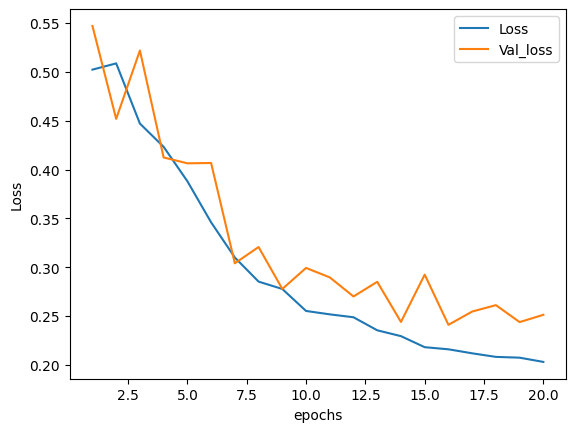

In [ ]:
q = len(hist_lr_sch_cnn.history['loss'])

plt.figsize = (10,10)
sns.lineplot(x = range(1,1+q),y = hist_lr_sch_cnn.history['loss'], label = 'Loss')
sns.lineplot(x = range(1,1+q),y = hist_lr_sch_cnn.history['val_loss'], label = 'Val_loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

## 6.5 Visualising accuracy and val_accuracy

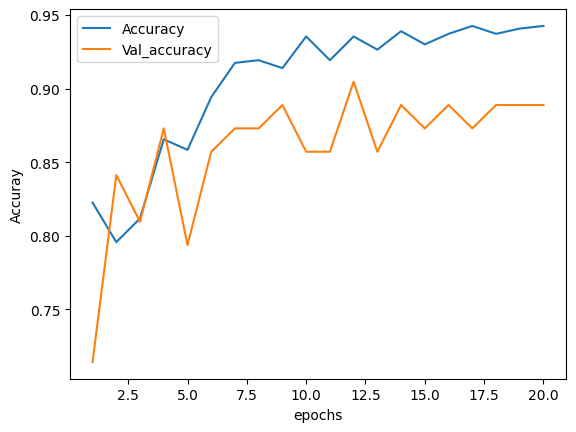

In [ ]:
q = len(hist_lr_sch_cnn.history['accuracy'])

plt.figsize = (10,10)
sns.lineplot(x = range(1,1+q),y = hist_lr_sch_cnn.history['accuracy'], label = 'Accuracy')
sns.lineplot(x = range(1,1+q),y = hist_lr_sch_cnn.history['val_accuracy'], label = 'Val_accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')
plt.show()

## 6.6 Confusion Matrix

5/5 [==============================] - 0s 4ms/step


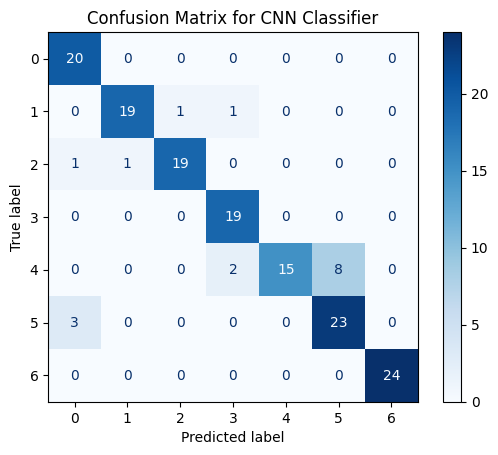

In [ ]:
# Predict the test data
y_pred_cnn = model_lr_sch_cnn.predict(X_test_sc)
y_hat_cnn = np.argmax(y_pred_cnn, axis = 1)

cm = confusion_matrix(y_test, y_hat_cnn)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix for CNN Classifier')
plt.show()

## 6.7 Evaluation Metrics

In [ ]:
# Importing the evaluation matrics and classification report
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score
accuracy  = accuracy_score(y_test, y_hat_cnn).round(4)
precision = precision_score(y_test, y_hat_cnn, average = 'macro').round(4)
recall = recall_score(y_hat_cnn, y_test, average = 'macro').round(4)
f1 = f1_score(y_hat_cnn, y_test, average = 'macro').round(4)

print("Evaluation Metrics:")
print("="*25)

# Creating a Dataframe for the Evaluation Metrics
scores_dt = [accuracy,precision,recall,f1]
test_score_dt = pd.DataFrame(scores_dt)
test_score_dt["Method"] = ["Accuracy", "Precision_macro", "Recall_macro", "F1_Score_macro"]
test_score_dt["Scores"] = test_score_dt[0]
test_score_dt.drop(columns = 0, inplace = True)
test_score_dt

Evaluation Metrics:


,Method,Scores
0,Accuracy,0.8910
1,Precision_macro,0.9056
2,Recall_macro,0.9056
3,F1_Score_macro,0.8924


In [ ]:
print("Classification Report for CNN:")
print("="*40)
pd.DataFrame(classification_report(y_test, y_hat_cnn, target_names = ["M","B","A","F","O","K","G"], output_dict=True)).transpose()

Classification Report for CNN:


,precision,recall,f1-score,support
M,0.833333,1.000000,0.909091,20.000000
B,0.950000,0.904762,0.926829,21.000000
A,0.950000,0.904762,0.926829,21.000000
F,0.863636,1.000000,0.926829,19.000000
O,1.000000,0.600000,0.750000,25.000000
K,0.741935,0.884615,0.807018,26.000000
G,1.000000,1.000000,1.000000,24.000000
accuracy,0.891026,0.891026,0.891026,0.891026
macro avg,0.905558,0.899163,0.892371,156.000000
weighted avg,0.905552,0.891026,0.887506,156.000000
